In [8]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import network_epidemic as ne

In [9]:
G = ne.generate_random_ws_graph()

In [10]:
l1 = nx.drawing.layout.spring_layout(G)
l2 = nx.drawing.layout.spectral_layout(G)
l3 = nx.drawing.layout.shell_layout(G)

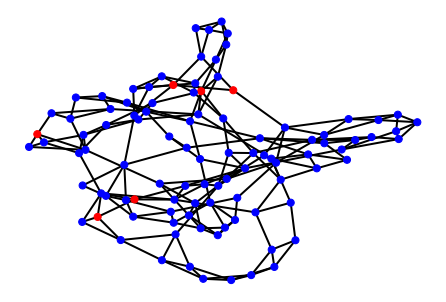

In [11]:
ne.plot_graph(G,layout=l1)

In [12]:
#details the graph
for n, nbrs in G.adj.items():
    print("Node",G.nodes[n])
    for nbr, eattr in nbrs.items():
        print("Neigh",G.nodes[nbr],"- p_edge",eattr['p'], "- minus log p", eattr['mlogp'])

Node {'state': 'I'}
Neigh {'state': 'I'} - p_edge 0.004181628789023775 - minus log p 5.477054445898288
Neigh {'state': 'S'} - p_edge 0.2049688651123934 - minus log p 1.5848971888788044
Neigh {'state': 'S'} - p_edge 0.049619100906910255 - minus log p 3.0033794204531743
Neigh {'state': 'S'} - p_edge 0.09072272537182023 - minus log p 2.3999473978774324
Node {'state': 'I'}
Neigh {'state': 'I'} - p_edge 0.004181628789023775 - minus log p 5.477054445898288
Neigh {'state': 'S'} - p_edge 0.13982079399463695 - minus log p 1.967393719222983
Neigh {'state': 'S'} - p_edge 0.13612284882873368 - minus log p 1.994197500764927
Node {'state': 'S'}
Neigh {'state': 'I'} - p_edge 0.13982079399463695 - minus log p 1.967393719222983
Neigh {'state': 'S'} - p_edge 0.004493605186149445 - minus log p 5.405099962627649
Neigh {'state': 'I'} - p_edge 0.049619100906910255 - minus log p 3.0033794204531743
Neigh {'state': 'S'} - p_edge 0.18988805893653327 - minus log p 1.6613205439385903
Node {'state': 'S'}
Neigh {'s

In [13]:
steps = 100
p_inf = 0.6
p_rec = 1.0/15
out_graphs,node_counts = ne.sir_simulate(G,steps=steps,inf_prob=p_inf, rec_prob=p_rec)

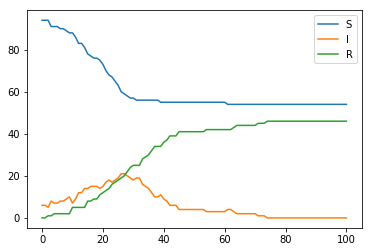

In [14]:
time = list(range(steps+1))
plt.plot(time,node_counts["S"],time,node_counts["I"],time,node_counts["R"])
plt.legend(["S","I","R"])
plt.show()

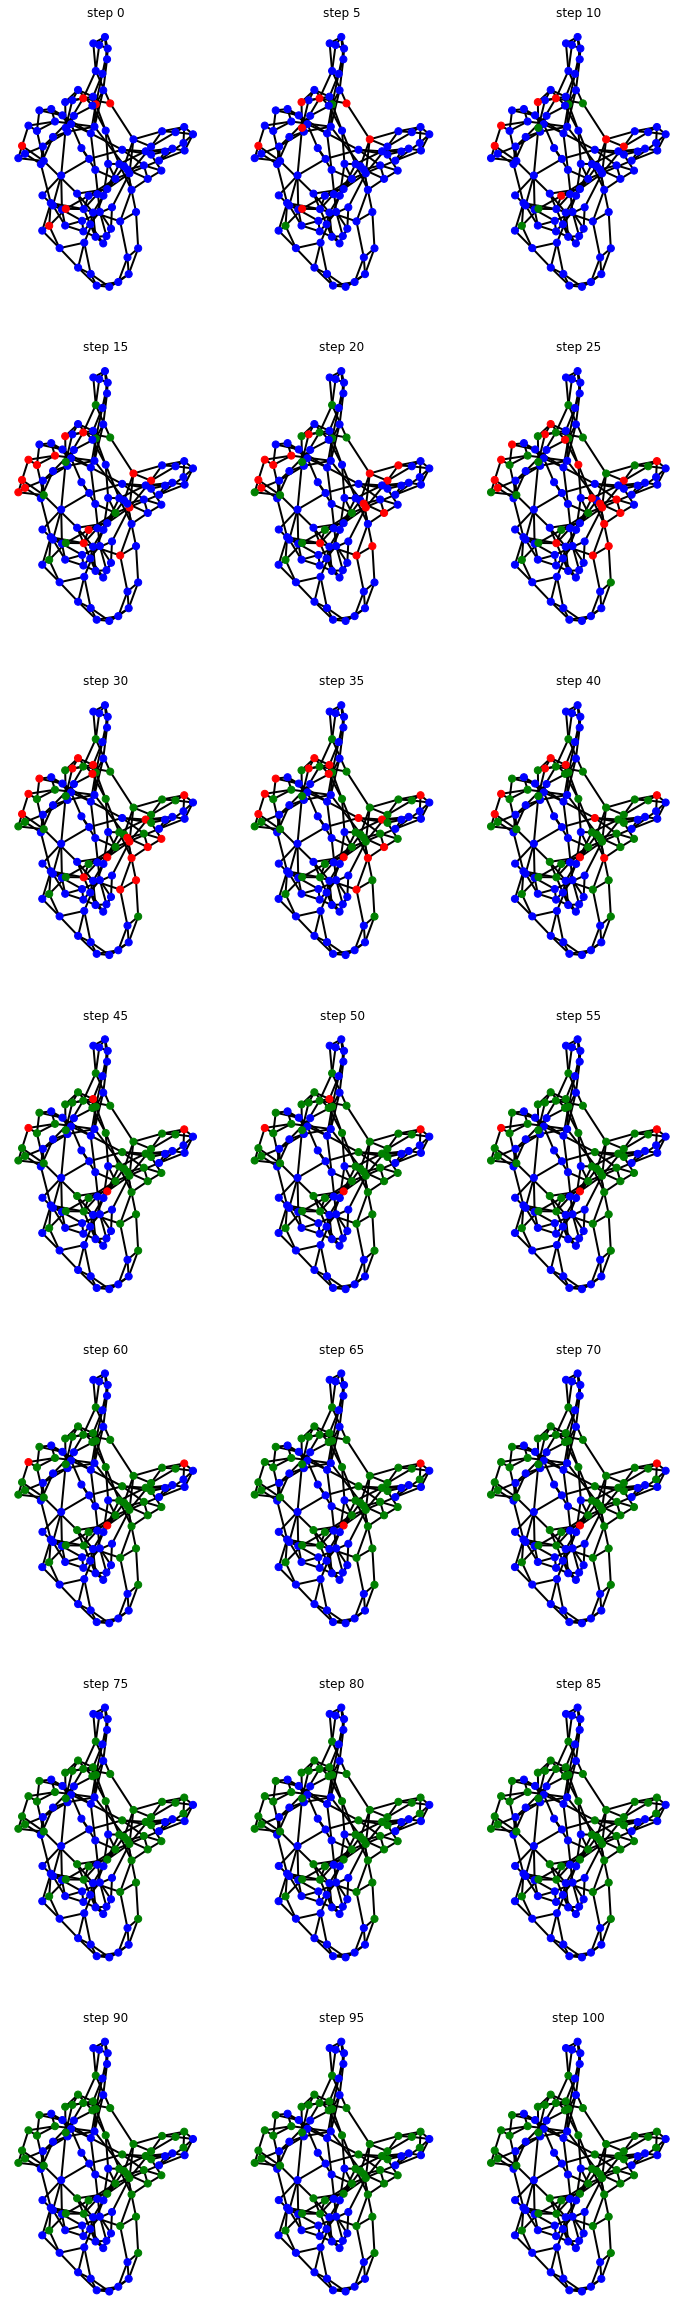

In [15]:
print_step = 5
cols = 3
n = (steps + 1) // print_step
rows = n //cols + 1
j = 0
fig = plt.figure(figsize=(4*cols, 6*rows))
for i in range(0,steps+1,print_step):
    j += 1
    plt.subplot(rows,cols,j)
    ne.plot_graph(out_graphs[i],layout=l1)
    plt.title("step " + str(i))

In [16]:
#todo: add a small probability of an infection from a random node

In [17]:
out_graphs

In [26]:
out_graphs[100].nodes[2]

{'state': 'R'}

In [19]:
help(out_graphs[0])

Help on Graph in module networkx.classes.graph object:

class Graph(builtins.object)
 |  Base class for undirected graphs.
 |  
 |  A Graph stores nodes and edges with optional data, or attributes.
 |  
 |  Graphs hold undirected edges.  Self loops are allowed but multiple
 |  (parallel) edges are not.
 |  
 |  Nodes can be arbitrary (hashable) Python objects with optional
 |  key/value attributes. By convention `None` is not used as a node.
 |  
 |  Edges are represented as links between nodes with optional
 |  key/value attributes.
 |  
 |  Parameters
 |  ----------
 |  incoming_graph_data : input graph (optional, default: None)
 |      Data to initialize graph. If None (default) an empty
 |      graph is created.  The data can be any format that is supported
 |      by the to_networkx_graph() function, currently including edge list,
 |      dict of dicts, dict of lists, NetworkX graph, NumPy matrix
 |      or 2d ndarray, SciPy sparse matrix, or PyGraphviz graph.
 |  
 |  attr : keyw